American Sign Language Interpreter

loading necessary libraries


In [20]:
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report

loading image data sets


In [23]:
train_dir = "asl_alphabet_train"
test_dir = "asl_alphabet_test"

img_height, img_width = 64, 64 # setting specific image size
batch_size = 32 # setting batch size

Preprocessing image dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(  # this is spliting training data for us from the directory
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(  # this is spliting validation data for us from the directory
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
classnames = train_ds.class_names

Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


Creating our neural network using different layers

In [25]:
model = Sequential([
    
    Input(shape=(64, 64, 3)),

    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),
    
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(29, activation='softmax')  
])

compiling our neural network model and initiating training process

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile( # compiling the model
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit( # begins training
    train_ds, 
    validation_data=val_ds,
    epochs=10
    
)

Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 150s 68ms/step - accuracy: 0.3491 - loss: 2.6177 - val_accuracy: 0.9020 - val_loss: 0.3199
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 144s 66ms/step - accuracy: 0.8781 - loss: 0.3613 - val_accuracy: 0.9734 - val_loss: 0.0817
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.9460 - loss: 0.1599 - val_accuracy: 0.9846 - val_loss: 0.0474
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 0.9702 - loss: 0.0918 - val_accuracy: 0.9933 - val_loss: 0.0193
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 168s 77ms/step - accuracy: 0.9741 - loss: 0.0787 - val_accuracy: 0.9954 - val_loss: 0.0156
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 137s 63ms/step - accuracy: 0.9794 - loss: 0.0646 - val_accuracy: 0.9958 - val_loss: 0.0146
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 152s 70ms/step - accuracy: 0.9821 - loss: 0.0558 - val_accuracy: 0.9929 - val_loss: 0.0199
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 144s 66ms/step - accuracy: 

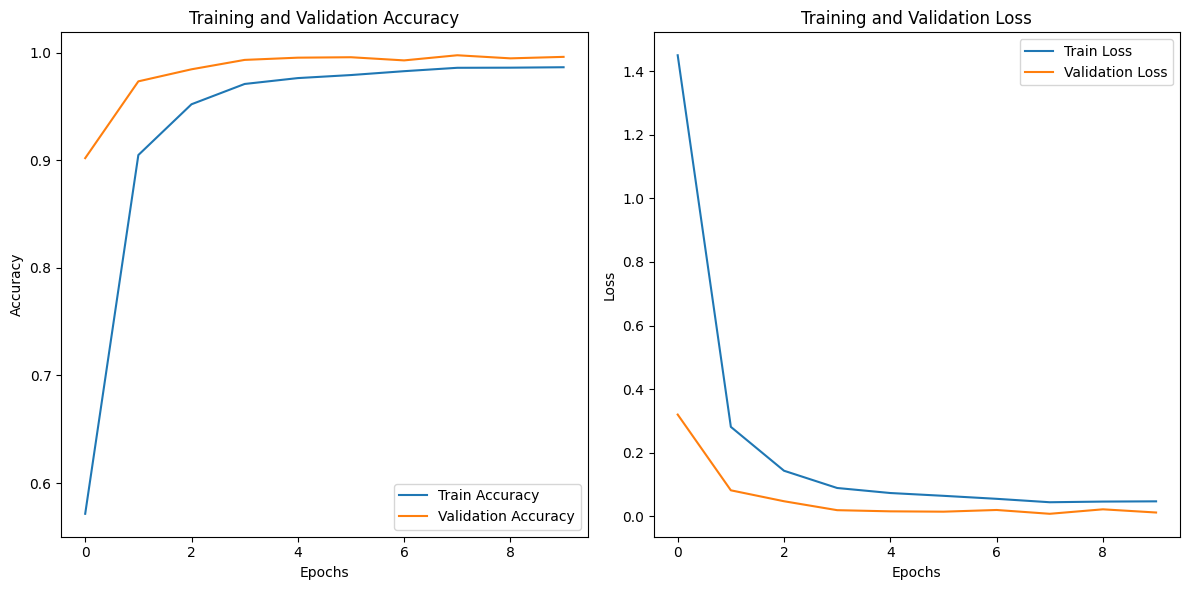

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
img_height, img_width = 64, 64
batch_size = 32 

test_images = []
test_filenames = os.listdir(test_dir)  

for img_filename in test_filenames:
    img_path = os.path.join(test_dir, img_filename)
    
    if os.path.isfile(img_path):  
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img)  
        img_array = np.expand_dims(img_array, axis=0)
        test_images.append(img_array)

test_images = np.vstack(test_images)  
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)
for i, pred in enumerate(predicted_classes):
    class_name = classnames[pred]
    print(f"This image  {test_filenames[i]} shows  a sign for : {class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
This image  A_test.jpg shows  a sign for : A
This image  B_test.jpg shows  a sign for : B
This image  C_test.jpg shows  a sign for : C
This image  D_test.jpg shows  a sign for : D
This image  E_test.jpg shows  a sign for : E
This image  F_test.jpg shows  a sign for : F
This image  G_test.jpg shows  a sign for : G
This image  H_test.jpg shows  a sign for : H
This image  I_test.jpg shows  a sign for : I
This image  J_test.jpg shows  a sign for : J
This image  K_test.jpg shows  a sign for : K
This image  L_test.jpg shows  a sign for : L
This image  M_test.jpg shows  a sign for : M
This image  nothing_test.jpg shows  a sign for : nothing
This image  N_test.jpg shows  a sign for : N
This image  O_test.jpg shows  a sign for : O
This image  P_test.jpg shows  a sign for : P
This image  Q_test.jpg shows  a sign for : Q
This image  R_test.jpg shows  a sign for : R
This image  space_test.jpg shows  a sign for : space
This image  S_test.jpg shows  a sign for :

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Map class indices to labels
class_labels = [chr(i) for i in range(65, 91)] + ['del', 'nothing', 'space']  # A-Z + extras

# Image dimensions expected by the model
img_height, img_width = 64, 64

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Draw a rectangle to indicate the region of interest (ROI)
    x1, y1, x2, y2 = 100, 100, 300, 300
    roi = frame[y1:y2, x1:x2]
    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Preprocess the ROI for prediction
    img = cv2.resize(roi, (img_height, img_width))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)  # shape (1, 64, 64, 3)

    # Predict
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions[0])
    label = class_labels[predicted_class]

    # Display label on frame
    cv2.putText(frame, f"Prediction: {label}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Show frame
    cv2.imshow("Sign Language Detector", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Clean up
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━